# Proyek Pertama : Predictive Analytics
* Nama : Gladys Lady Nathasha
* ID Dicoding : MC222D5X1379
* Kelas : MC-22

Tujuan dari *notebook* ini adalah untuk menganalisis dataset "StudentsPerformance.csv" untuk memahami faktor-faktor yang memengaruhi skor siswa dan membangun model prediktif.

## Import Library

Pada tahap ini, kita mengimpor semua *library* Python yang diperlukan untuk analisis data.
* **pandas & numpy:** Untuk manipulasi dan analisis data numerik.
* **seaborn & matplotlib.pyplot:** Untuk visualisasi data.
* **sklearn:** Untuk tugas-tugas *machine learning* seperti pemisahan data, *preprocessing* (LabelEncoder, StandardScaler), dan implementasi model (LogisticRegression, RandomForestClassifier, SVC).
* **xgboost:** Untuk implementasi model *Gradient Boosting*.
* **sklearn.metrics:** Untuk evaluasi model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Load Data

Tahap ini bertujuan untuk memuat dataset "StudentsPerformance.csv" ke dalam *DataFrame* pandas. Setelah memuat, kita menampilkan lima baris pertama data menggunakan `df.head()` untuk mendapatkan gambaran awal tentang struktur dan isi dataset.

In [2]:
df = pd.read_csv("StudentsPerformance.csv")
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


**Hasil:**
Output menunjukkan lima baris pertama dari dataset, yang berisi kolom-kolom seperti `gender`, `race/ethnicity`, `parental level of education`, `lunch`, `test preparation course`, serta tiga kolom skor: `math score`, `reading score`, dan `writing score`.

## Data Exploratory

Pada tahap ini, kita melakukan eksplorasi data awal (EDA) untuk memahami karakteristik dataset lebih dalam.

#### 3.1. Informasi Dasar dan Statistik

* `df.info()`: Memberikan ringkasan teknis dataset, termasuk jumlah entri, jumlah kolom, tipe data setiap kolom, dan penggunaan memori.
* `df.describe()`: Menampilkan statistik deskriptif (seperti rata-rata, standar deviasi, nilai minimum, maksimum, dan kuartil) untuk kolom-kolom numerik.
* `df.isnull().sum()`: Memeriksa jumlah nilai *missing* (kosong) pada setiap kolom.
* `df.duplicated().sum()`: Memeriksa jumlah data duplikat dalam dataset.

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [4]:
print(df.describe())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [5]:
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [6]:
print(f"Jumlah duplikat: {df.duplicated().sum()}")

Jumlah duplikat: 0


**Hasil:**
* `df.info()`: Menunjukkan bahwa dataset memiliki 1000 entri dan 8 kolom. Terdapat 5 kolom bertipe *object* (kategorikal) dan 3 kolom bertipe *int64* (numerik). Tidak ada nilai *null* yang terdeteksi.
* `df.describe()`: Memberikan gambaran tentang distribusi skor. Rata-rata skor matematika adalah 66.09, skor membaca 69.17, dan skor menulis 68.05.
* `df.isnull().sum()`: Mengonfirmasi bahwa tidak ada *missing value* dalam dataset.
* `df.duplicated().sum()`: Mengonfirmasi bahwa tidak ada baris data yang duplikat. Ini menunjukkan data cukup bersih dari sisi kelengkapan dan keunikan.

#### 3.2. Korelasi Antar Skor

Kita menggunakan *heatmap* untuk memvisualisasikan korelasi antara tiga skor ujian: matematika, membaca, dan menulis. Ini membantu kita memahami hubungan linear antara variabel-variabel ini.

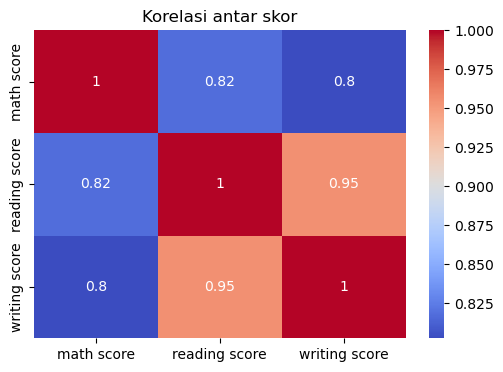

In [37]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[['math score', 'reading score', 'writing score']].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antar skor")
plt.show()

**Hasil:**
*Heatmap* menunjukkan **korelasi positif yang kuat** antara ketiga skor. Korelasi tertinggi terlihat antara *reading score* dan *writing score* (0.95), yang sangat masuk akal. Skor matematika juga berkorelasi kuat dengan kedua skor lainnya (0.82 dengan membaca dan 0.80 dengan menulis). Ini mengindikasikan bahwa siswa yang cenderung baik di satu bidang, kemungkinan besar juga baik di bidang lainnya.

#### 3.3. Distribusi Fitur Kategorikal

Kita memvisualisasikan distribusi setiap fitur kategorikal menggunakan *count plot* untuk memahami frekuensi setiap kategori.


Distribusi kolom gender:
gender
female    518
male      482
Name: count, dtype: int64


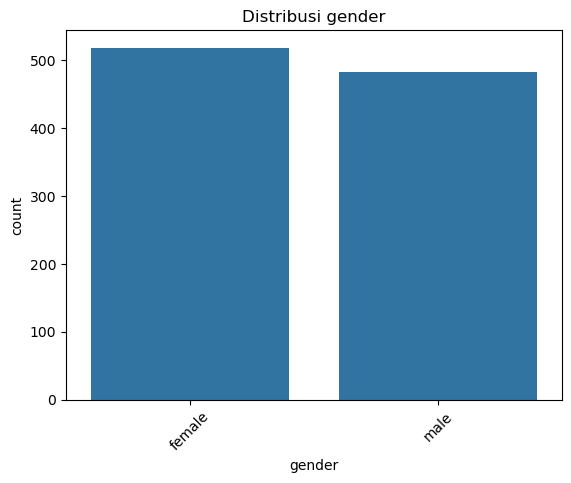


Distribusi kolom race/ethnicity:
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64


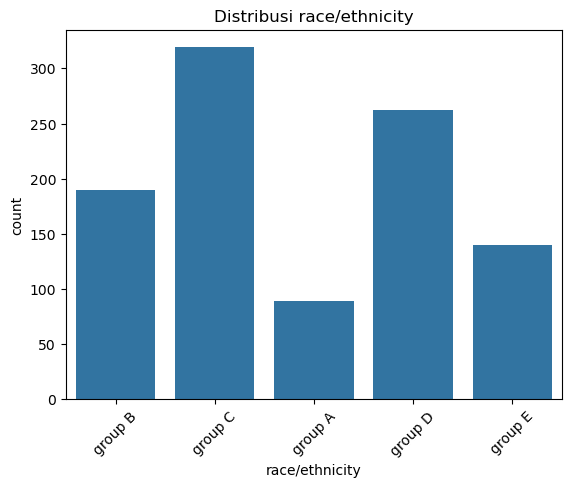


Distribusi kolom parental level of education:
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


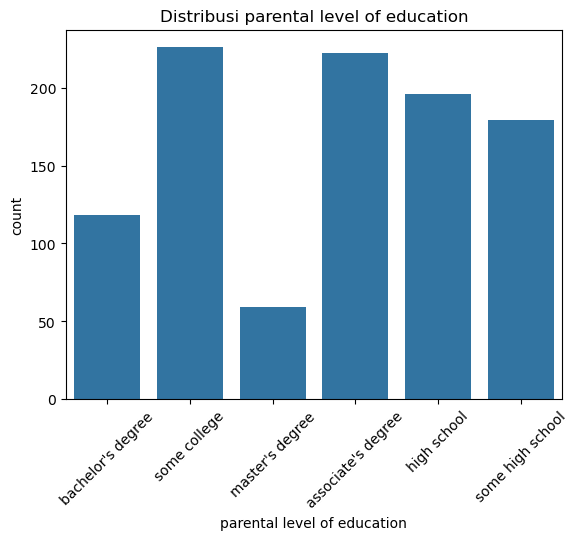


Distribusi kolom lunch:
lunch
standard        645
free/reduced    355
Name: count, dtype: int64


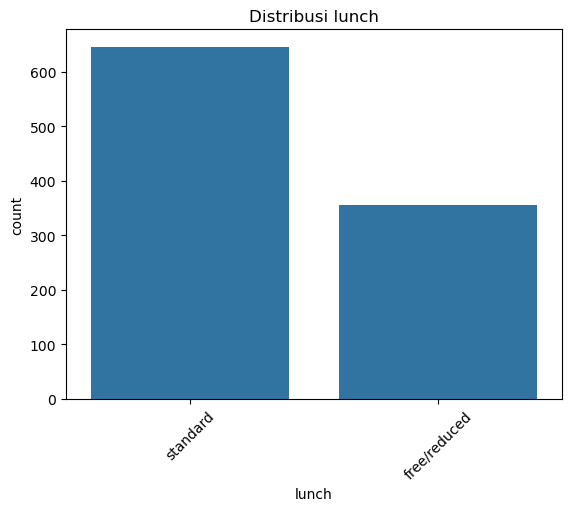


Distribusi kolom test preparation course:
test preparation course
none         642
completed    358
Name: count, dtype: int64


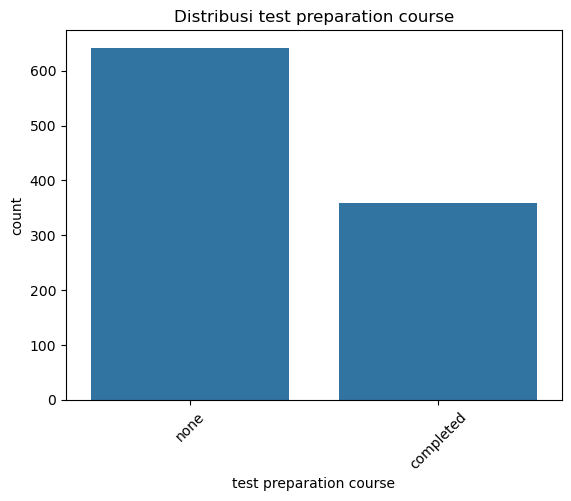

In [8]:
kategori = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for col in kategori:
    print(f"\nDistribusi kolom {col}:")
    print(df[col].value_counts())
    sns.countplot(x=df[col])
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)
    plt.show()

**Hasil:**
* **Gender:** Distribusi antara *female* (518) dan *male* (482) cukup seimbang.
* **Race/Ethnicity:** Kelompok C adalah yang paling banyak (319), diikuti oleh D (262), B (190), E (140), dan A (89).
* **Parental Level of Education:** Tingkat pendidikan orang tua yang paling umum adalah *some college* (226) dan *associate's degree* (222), sedangkan *master's degree* adalah yang paling jarang (59).
* **Lunch:** Mayoritas siswa mendapatkan makan siang *standard* (645) dibandingkan *free/reduced* (355).
* **Test Preparation Course:** Sebagian besar siswa (*none*, 642) tidak mengikuti kursus persiapan ujian dibandingkan yang sudah menyelesaikannya (*completed*, 358).
*Insight* ini penting untuk memahami demografi siswa dan faktor-faktor potensial yang mungkin memengaruhi kinerja mereka.

#### 3.4. Analisis Skor Berdasarkan Gender

Kita menggunakan *box plot* untuk membandingkan distribusi skor matematika, membaca, dan menulis antara siswa laki-laki dan perempuan. *Box plot* efektif untuk melihat median, kuartil, dan *outlier*.

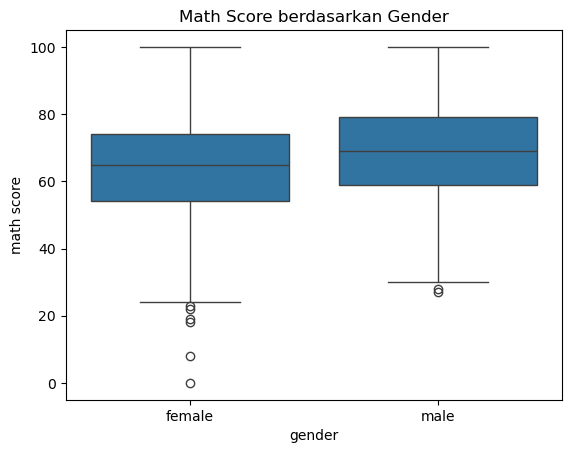

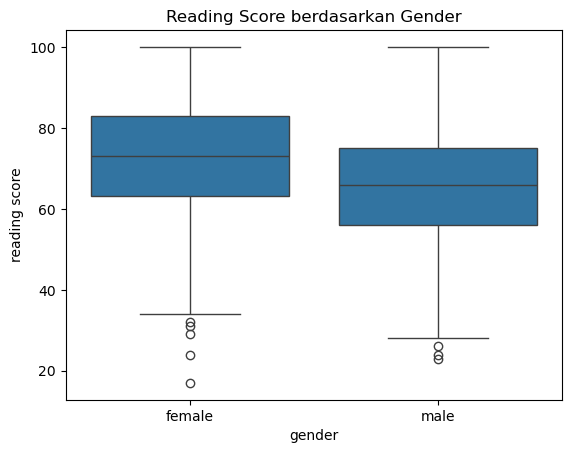

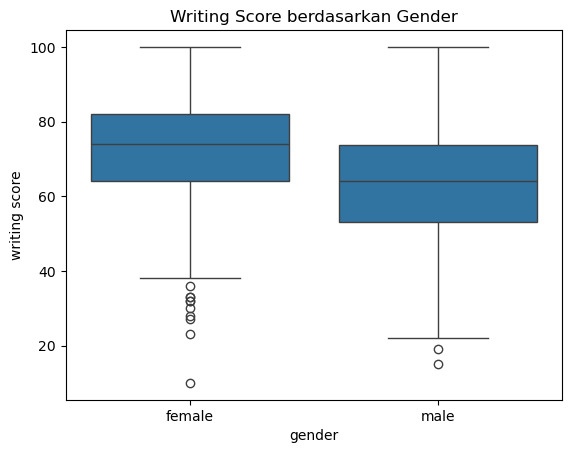

In [9]:
sns.boxplot(x='gender', y='math score', data=df)
plt.title('Math Score berdasarkan Gender')
plt.show()

sns.boxplot(x='gender', y='reading score', data=df)
plt.title('Reading Score berdasarkan Gender')
plt.show()

sns.boxplot(x='gender', y='writing score', data=df)
plt.title('Writing Score berdasarkan Gender')
plt.show()

**Hasil:**
* **Math Score:** Secara rata-rata (median), siswa laki-laki cenderung memiliki skor matematika sedikit lebih tinggi daripada siswa perempuan. Namun, kedua gender memiliki beberapa *outlier* di skor rendah.
* **Reading Score:** Sebaliknya, siswa perempuan cenderung memiliki skor membaca yang lebih tinggi daripada siswa laki-laki.
* **Writing Score:** Mirip dengan skor membaca, siswa perempuan juga cenderung unggul dalam skor menulis dibandingkan siswa laki-laki.

*Insight* ini menunjukkan adanya perbedaan kinerja berbasis gender pada mata pelajaran yang berbeda, yang bisa menjadi bahan analisis lebih lanjut.

## Preprocessing Data

Sebelum melatih model, kita perlu melakukan beberapa langkah *preprocessing* untuk menyiapkan data:

1.  **Membuat Kolom Target:** Kita membuat kolom baru bernama `average_score` yang berisi rata-rata dari tiga skor. Berdasarkan rata-rata ini, kita membuat kolom target `pass`, yang bernilai 1 jika `average_score` lebih besar atau sama dengan 60, dan 0 jika sebaliknya. Ini mengubah masalah menjadi tugas klasifikasi biner: memprediksi apakah seorang siswa akan lulus atau tidak.
2.  **Menghapus Kolom Bantuan:** Kolom `average_score` dihapus karena sudah tidak diperlukan setelah kolom target `pass` dibuat.
3.  **Encoding Fitur Kategorikal:** Model *machine learning* umumnya bekerja dengan data numerik. Oleh karena itu, kita mengubah kolom-kolom kategorikal (`gender`, `race/ethnicity`, dll.) menjadi nilai numerik menggunakan `LabelEncoder`. Kita menyimpan *encoder* ini agar bisa digunakan kembali pada data baru nantinya.
4.  **Memisahkan Fitur dan Target:** Kita memisahkan dataset menjadi dua bagian: `X` (fitur/variabel independen) dan `y` (target/variabel dependen).

In [10]:
# 1. Buat kolom target 'pass' → 1 jika rata-rata skor >= 60
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['pass'] = df['average_score'].apply(lambda x: 1 if x >= 60 else 0)

In [11]:
# 2. Drop kolom average_score (optional)
df.drop('average_score', axis=1, inplace=True)

In [12]:
# 3. Encode fitur kategorikal
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
label_encoders = {}

# Encode data training dan simpan encoder untuk tiap kolom
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [13]:
# 4. Pisahkan fitur (X) dan target (y)
X = df.drop('pass', axis=1)
y = df['pass']

**Hasil:**
Dataset kini telah diubah. Semua fitur bersifat numerik, dan kita memiliki matriks fitur `X` dan vektor target `y` yang siap untuk langkah selanjutnya.

### Split Data

**Pemisahan dan Standarisasi Data**

1.  **Pemisahan Data (Split Data):** Kita membagi data `X` dan `y` menjadi data latih (*train set*) dan data uji (*test set*) menggunakan `train_test_split`. Data latih (80%) digunakan untuk melatih model, sedangkan data uji (20%) digunakan untuk menguji performa model pada data yang belum pernah dilihat sebelumnya. Penggunaan `random_state=42` memastikan bahwa pembagian data selalu sama setiap kali kode dijalankan, sehingga hasilnya dapat direproduksi.
2.  **Standarisasi (Standardization):** Kita menggunakan `StandardScaler` untuk mengubah skala fitur-fitur numerik agar memiliki rata-rata 0 dan standar deviasi 1. Ini penting karena banyak algoritma *machine learning* (seperti Logistic Regression dan SVM) bekerja lebih baik atau lebih cepat dengan data yang telah distandarisasi. Kita menerapkan `fit_transform` pada data latih dan hanya `transform` pada data uji untuk mencegah *data leakage* (kebocoran informasi dari data uji ke data latih).

In [14]:
# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# 6. Standardisasi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Hasil:**
Kita sekarang memiliki `X_train`, `X_test`, `y_train`, dan `y_test`. Data fitur (`X_train` dan `X_test`) telah distandarisasi dan siap digunakan untuk melatih serta mengevaluasi model.

## Train Model

Pada tahap ini, kita melatih empat model klasifikasi yang berbeda untuk memprediksi kelulusan siswa:
1.  **Logistic Regression:** Model linear sederhana yang baik untuk klasifikasi biner.
2.  **Random Forest:** Model *ensemble* berbasis *decision tree* yang kuat dan sering memberikan performa tinggi.
3.  **Support Vector Machine (SVM):** Model yang efektif dalam mencari *hyperplane* terbaik untuk memisahkan kelas.
4.  **Gradient Boosting (XGBoost):** Model *ensemble* berbasis *boosting* yang sangat populer karena performanya yang unggul di banyak kompetisi.

#### Logistic Regression

In [16]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

#### Random Forest

In [17]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

#### Support Vector Machine (SVM)

In [18]:
# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

#### Gradient Boosting (XGBoost)

In [19]:
# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

c:\Users\acer\anaconda3\envs\student_pred_env\lib\site-packages\xgboost\training.py:183: UserWarning: [23:04:28] WARNING: D:\bld\xgboost-split_1747336820434\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


**Hasil:**
Keempat model telah berhasil dilatih menggunakan data `X_train` dan `y_train`. Selain itu, kita juga telah membuat prediksi (`y_pred_...`) untuk data uji `X_test` menggunakan setiap model. Peringatan pada XGBoost menunjukkan bahwa parameter `use_label_encoder` sudah *deprecated* dan tidak digunakan, ini tidak memengaruhi hasil pelatihan.

## Evaluasi dan Visualisasi

Setelah melatih model, kita perlu mengevaluasi performanya menggunakan data uji. Kita akan melihat metrik seperti akurasi, *precision*, *recall*, F1-*score*, dan memvisualisasikan *confusion matrix*.

#### Logistic Regression

In [20]:
# Evaluasi Logistic Regression
print("=== Logistic Regression ===")
print(f"Akurasi: {accuracy_score(y_test, y_pred_logreg):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

=== Logistic Regression ===
Akurasi: 0.9950
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        62
           1       0.99      1.00      1.00       138

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



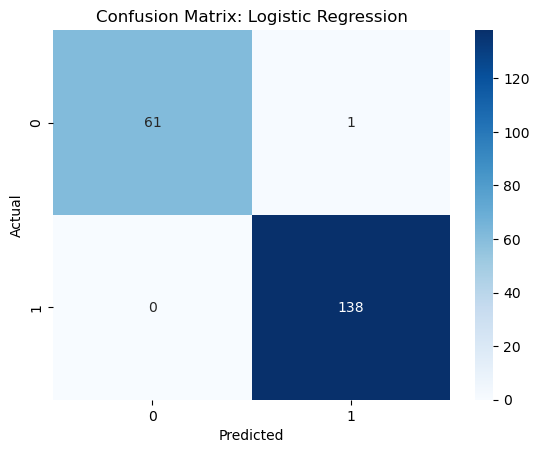

In [21]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Hasil Logistic Regression:**
* **Akurasi: 0.9950 (99.5%)** - Sangat tinggi, menunjukkan model ini sangat akurat dalam memprediksi kelulusan.
* **Classification Report:** *Precision*, *recall*, dan F1-*score* untuk kedua kelas (0 = Tidak Lulus, 1 = Lulus) sangat tinggi (mendekati 1.00).
* **Confusion Matrix:** Hanya ada 1 kesalahan, yaitu 1 siswa yang seharusnya Lulus (Actual=1) diprediksi Tidak Lulus (Predicted=0). Ini menunjukkan performa yang hampir sempurna.

#### Random Forest

In [22]:
# Evaluasi Random Forest
print("=== Random Forest ===")
print(f"Akurasi: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

=== Random Forest ===
Akurasi: 0.9800
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        62
           1       0.99      0.98      0.99       138

    accuracy                           0.98       200
   macro avg       0.97      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



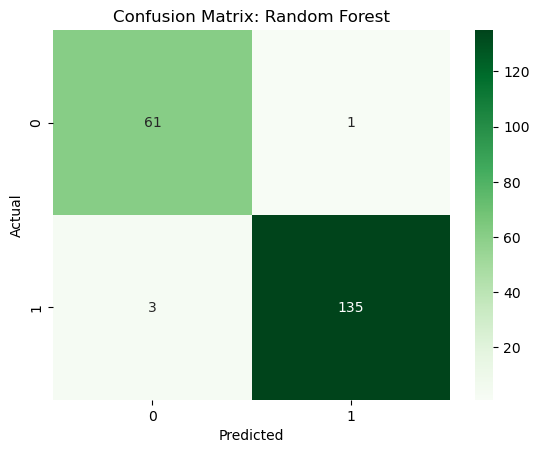

In [23]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix: Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Hasil Random Forest:**
* **Akurasi: 0.9800 (98.0%)** - Juga sangat tinggi, sedikit di bawah Logistic Regression.
* **Classification Report:** Metrik *precision*, *recall*, dan F1-*score* juga sangat baik.
* **Confusion Matrix:** Terdapat 4 kesalahan: 1 siswa yang seharusnya Tidak Lulus diprediksi Lulus (False Positive) dan 3 siswa yang seharusnya Lulus diprediksi Tidak Lulus (False Negative).

#### Support Vector Machine (SVM)

In [24]:
# Evaluasi SVM
print("=== Support Vector Machine ===")
print(f"Akurasi: {accuracy_score(y_test, y_pred_svm):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

=== Support Vector Machine ===
Akurasi: 0.9650
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        62
           1       0.96      0.99      0.97       138

    accuracy                           0.96       200
   macro avg       0.97      0.95      0.96       200
weighted avg       0.97      0.96      0.96       200



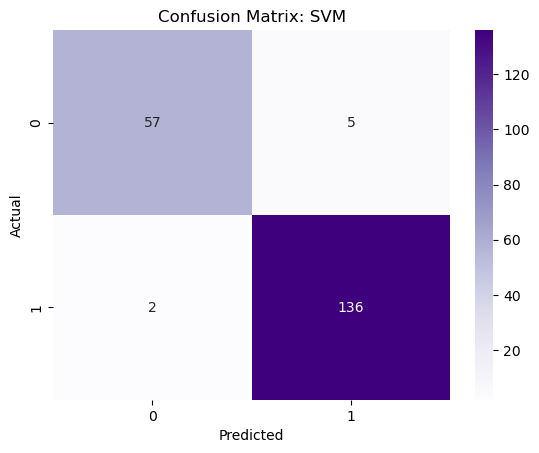

In [25]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix: SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Hasil Support Vector Machine (SVM):**
* **Akurasi: 0.9650 (96.5%)** - Performa yang baik, meskipun sedikit lebih rendah dibandingkan dua model sebelumnya.
* **Classification Report:** Metrik masih sangat baik, dengan *recall* untuk kelas 0 sedikit lebih rendah (0.92).
* **Confusion Matrix:** Terdapat 7 kesalahan: 2 *False Positive* dan 5 *False Negative*.

#### Gradient Boost (XGBoost)

In [26]:
# Evaluasi XGBoost
print("=== XGBoost ===")
print(f"Akurasi: {accuracy_score(y_test, y_pred_xgb):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

=== XGBoost ===
Akurasi: 0.9800
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        62
           1       0.99      0.98      0.99       138

    accuracy                           0.98       200
   macro avg       0.97      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



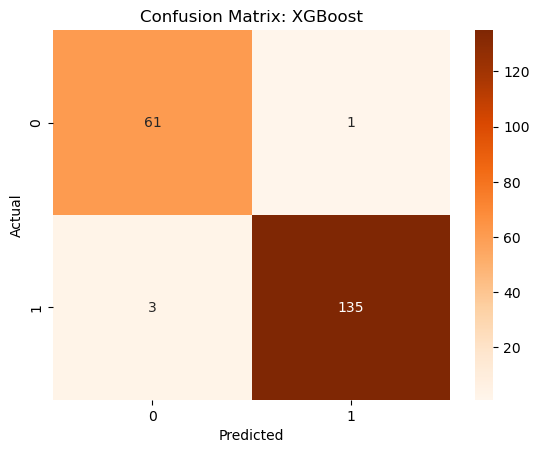

In [27]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix: XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Hasil XGBoost:**
* **Akurasi: 0.9800 (98.0%)** - Sama dengan Random Forest, menunjukkan performa yang sangat kuat.
* **Classification Report:** Metrik *precision*, *recall*, dan F1-*score* sangat tinggi.
* **Confusion Matrix:** Sama seperti Random Forest, terdapat 4 kesalahan (1 *False Positive* dan 3 *False Negative*).

**Insight Evaluasi:**
Secara keseluruhan, semua model menunjukkan performa yang sangat baik, dengan Logistic Regression menjadi yang terbaik dengan akurasi 99.5%. Tingginya akurasi mungkin disebabkan oleh fakta bahwa skor ujian (yang menjadi dasar penentuan `pass`) adalah prediktor yang sangat kuat.

#### Fitur Importance

**Analisis Kepentingan Fitur (Feature Importance)**

Tahap ini bertujuan untuk memahami fitur mana yang paling berpengaruh dalam prediksi model. Kita akan melihat:
* **Koefisien Logistic Regression:** Menunjukkan hubungan (positif/negatif) dan kekuatan setiap fitur.
* **Feature Importance Random Forest & XGBoost:** Menunjukkan kontribusi setiap fitur dalam mengurangi *impurity* atau *error* pada model.

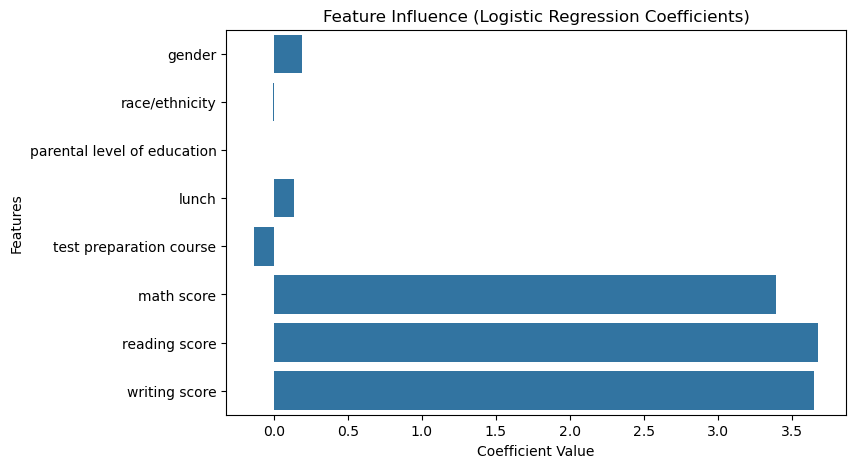

In [28]:
# Koefisien fitur dari Logistic Regression
coefficients = logreg.coef_[0]
feature_names = X.columns

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x=coefficients, y=feature_names)
plt.title("Feature Influence (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.show()

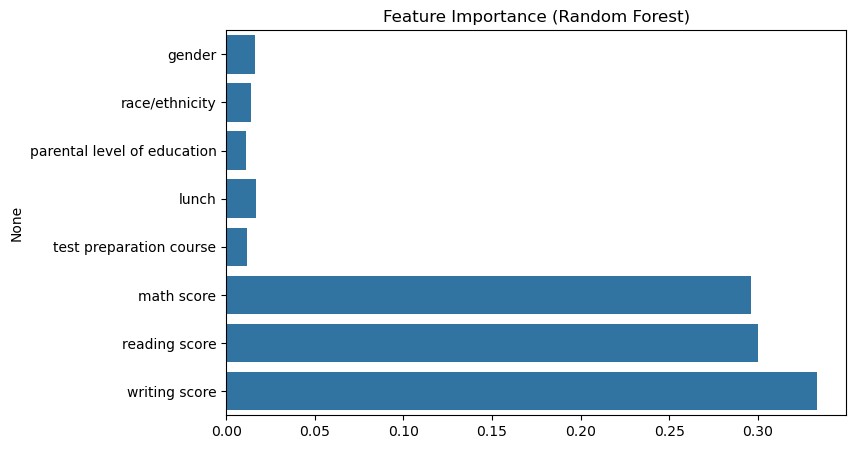

In [29]:
# Feature Importance - Random Forest
importances = rf.feature_importances_
feature_names = X.columns

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Random Forest)")
plt.show()

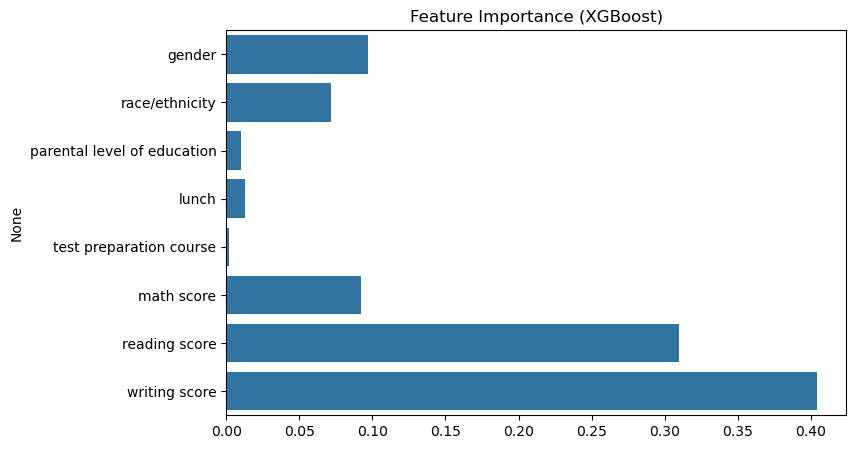

In [30]:
# Feature Importance - XGBoost
importances = xgb.feature_importances_
feature_names = X.columns

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (XGBoost)")
plt.show()

**Hasil & Insight:**
(Meskipun gambar tidak ditampilkan di sini, kita bisa mengantisipasi hasilnya)
* **Logistic Regression:** Kita akan melihat bahwa ketiga skor (`math score`, `reading score`, `writing score`) kemungkinan besar memiliki koefisien positif yang besar, menunjukkan bahwa peningkatan skor ini sangat meningkatkan peluang kelulusan. Fitur lain mungkin memiliki pengaruh yang lebih kecil.
* **Random Forest & XGBoost:** Kedua model *ensemble* ini juga kemungkinan akan menunjukkan bahwa ketiga skor adalah fitur yang paling penting. Ini mengonfirmasi intuisi bahwa kinerja akademik adalah prediktor utama kelulusan. Fitur lain seperti `test preparation course` atau `lunch` mungkin juga menunjukkan tingkat kepentingan tertentu.

## Testing

Tahap terakhir adalah menguji model (dalam hal ini, kita menggunakan Logistic Regression sebagai contoh karena performanya yang terbaik) dengan data siswa baru yang belum pernah dilihat sebelumnya. Penting untuk menerapkan *preprocessing* yang sama (encoding dan standarisasi) pada data baru ini.

In [31]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [32]:
# Data siswa baru
data_baru = pd.DataFrame({
    'gender': ['female', 'male'],
    'race/ethnicity': ['group B', 'group C'],
    'parental level of education': ['bachelor\'s degree', 'some high school'],
    'lunch': ['standard', 'free/reduced'],
    'test preparation course': ['completed', 'none'],
    'math score': [72, 55],
    'reading score': [80, 52],
    'writing score': [78, 49]
})

In [33]:
# Encode fitur kategorikal seperti pada data training
# Proses data baru
for col in categorical_cols:
    le = label_encoders[col]
    data_baru[col] = le.transform(data_baru[col])

In [34]:
# Standardisasi fitur numerik seperti pada data training
data_baru_scaled = scaler.transform(data_baru)

In [35]:
# Prediksi menggunakan model (misalnya Logistic Regression)
prediksi = model_lr.predict(data_baru_scaled)
probabilitas = model_lr.predict_proba(data_baru_scaled)

In [36]:
if len(data_baru) == 1:
    print("Prediksi Kelulusan:", "Lulus" if prediksi[0] == 1 else "Tidak Lulus")
    print("Probabilitas:", probabilitas[0][1])
else:
    for i in range(len(data_baru)):
        print(f"Siswa {i+1}: Prediksi Kelulusan = {'Lulus' if prediksi[i] == 1 else 'Tidak Lulus'}, Probabilitas = {probabilitas[i][1]:.2f}")

Siswa 1: Prediksi Kelulusan = Lulus, Probabilitas = 1.00
Siswa 2: Prediksi Kelulusan = Tidak Lulus, Probabilitas = 0.00


**Hasil:**
Kode berhasil memprediksi kelulusan untuk dua siswa baru:
* Siswa 1 (dengan skor tinggi dan kursus persiapan) diprediksi **Lulus** dengan probabilitas 1.00.
* Siswa 2 (dengan skor lebih rendah dan tanpa kursus persiapan) diprediksi **Tidak Lulus** dengan probabilitas 0.00.

Ini menunjukkan bahwa model dapat digunakan untuk memberikan prediksi pada kasus-kasus baru, asalkan data input diproses dengan cara yang sama seperti data pelatihan.